### Find bumps
觀察原始資料的 y 使否有突然變動 >1 或 <1 的情形，如果沒有這些情形，就代表"Anamoly detection"適用。Anamoly的定義，2個ytrain標準差(1.13*2)以外的不純度 (y_hat - 2 lamda > 0 的預測值)。

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [7]:
# 以 y_train 的標準差當作參考值
std = 1.1303980457890859
mean = 2.397747739399871
threshold = mean + 2*std
print(threshold)

4.658543830978043


In [5]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv", decimal=',')
# data = data.replace(",", ".", regex=True) 
data = data.drop(data.index[list(range(442471+122000,442471+134500))])
data = data.reset_index(drop=True)
display(data.head(3))

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31


In [6]:
bump_cnt = 0 # 有幾個大型振盪
y_val = data['% Silica Concentrate']

prev_value = y_val[0]
for v in y_val:
    if abs(prev_value - v) >= 2*std:
        bump_cnt += 1
    prev_value = v
print('大型震幅的數量 (突然改變2個std):', bump_cnt, f'，總資料有 {len(data)} 筆，佔比 {bump_cnt/len(data)*100:.4f}%')

大型震幅的數量 (突然改變2個std): 103 ，總資料有 724953 筆，佔比 0.0142%


In [7]:
bump_cnt = 0 # 有幾個大型振盪
y_val = data['% Silica Concentrate']

prev_value = y_val[0]
for v in y_val:
    if abs(prev_value - v) >= 1*std:
        bump_cnt += 1
    prev_value = v
print('大型震幅的數量 (突然改變1個std):', bump_cnt, f'，總資料有 {len(data)} 筆，佔比 {bump_cnt/len(data)*100:.4f}%')

大型震幅的數量 (突然改變1個std): 478 ，總資料有 724953 筆，佔比 0.0659%


### Find outliers

In [11]:
y_val = data['% Silica Concentrate']

outlier_cnt = 0
for v in y_val:
    if v > threshold:
        outlier_cnt += 1
outlier_cnt
print('Outlier的數量:', outlier_cnt, f'，總資料有 {len(data)} 筆，佔比 {outlier_cnt/len(data)*100:.4f}%')

Outlier的數量: 42094 ，總資料有 724953 筆，佔比 5.8064%


### Moving average

In [30]:
# record Moving average
window = []
y_pred = []
y_true = []
window_size = 45
ticks = 12
exact_match_cnt = 0

i = 0
while i < len(y_val):
    window.append(y_val[i])
    if len(window) < window_size:
        i += ticks
        continue
    else:
        average = np.mean(window)
        y_pred.append(average)
        y_true.append(y_val[i])
        window.pop(0)
        if y_pred[-1] == y_true[-1]:
            exact_match_cnt += 1
    i += ticks
print('window_size', window_size, ', number of moving average windows', len(y_pred), len(y_true))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print('mse', mse)
print('exact_match_cnt', exact_match_cnt)

window_size 45 , number of moving average windows 60369 60369
mse 0.3987344698083317
exact_match_cnt 578


In [29]:
# record Moving average
window = []
y_pred = []
y_true = []
window_size = 30
ticks = 12
exact_match_cnt = 0

i = 0
while i < len(y_val):
    window.append(y_val[i])
    if len(window) < window_size:
        i += ticks
        continue
    else:
        average = np.mean(window)
        y_pred.append(average)
        y_true.append(y_val[i])
        window.pop(0)
        if y_pred[-1] == y_true[-1]:
            exact_match_cnt += 1
    i += ticks
print('window_size', window_size, ', number of moving average windows', len(y_pred), len(y_true))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print('mse', mse)
print('exact_match_cnt', exact_match_cnt)

window_size 30 , number of moving average windows 60384 60384
mse 0.308532992706871
exact_match_cnt 2530


### Moving average on testing data

In [9]:
data_y = pd.read_csv("./reduceddata-ticks-12/y_test.csv", header=None)
data_y.columns = ['% Silica Concentrate']
data_y.head(3)

data_y = data_y['% Silica Concentrate']

In [10]:
# record Moving average
window = []
y_pred = []
y_true = []
window_size = 45 
ticks = 1
exact_match_cnt = 0

i = 0
while i < len(data_y):
    window.append(data_y[i])
    if len(window) < window_size:
        i += ticks
        continue
    else:
        average = np.mean(window)
        y_pred.append(average)
        y_true.append(data_y[i])
        window.pop(0)
        if y_pred[-1] == y_true[-1]:
            exact_match_cnt += 1
    i += ticks
print('window_size', window_size, ', number of moving average windows', len(y_pred), len(y_true))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
print('mse', mse)
print('exact_match_cnt', exact_match_cnt)

window_size 45 , number of moving average windows 12039 12039
mse 0.3697268440240173
exact_match_cnt 36


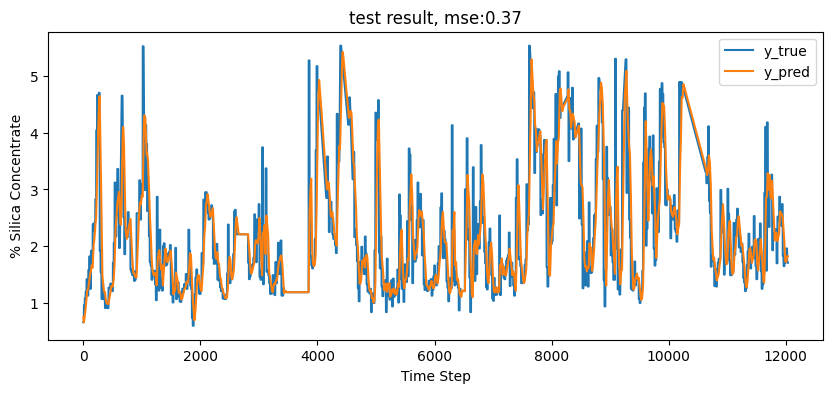

In [15]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

x = list(range(len(y_true)))
mse_train = mean_squared_error(y_true, y_pred)
plt.plot(x, y_true, label = "y_true")
plt.plot(x, y_pred, label = "y_pred")
plt.legend()
plt.title(f'test result, mse:{mse_train:.2f}')
plt.xlabel('Time Step')
plt.ylabel('% Silica Concentrate')
plt.show()